<a href="https://colab.research.google.com/github/youngjin1106/sales-predictions/blob/main/Sales_Prediction_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd

In [3]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [4]:
# Checking if there has any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Checking duplicates
df.duplicated().sum()

0

In [6]:
# easy way to find missing values with using isna.sum()
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

For the Item_Weight I chose to take the average weight of the items. I felt with the data that was already known this would give a good data to fill the missing. I did not want to drop this data becasue shipping costs would affect the price of the product. Which in turn could affect the sales of the product.
I also chose do the msot frequent for the store size. The size of the store could impact the amount sold. 

In [7]:
# there has many data to just drop all missing values
# using mean instead dropna
item_weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(item_weight_mean, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
outlet_size_mode = df['Outlet_Size'].mode()
df['Outlet_Size'].fillna(outlet_size_mode, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Fix typo from Item Fat Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
# double check if they fix it or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# define the min, max, and mean value for the numeric columns
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).min()
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).max()
df.groupby(['Item_Weight', 'Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Item_Outlet_Sales']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


Empty DataFrame
Columns: []
Index: [(4.555, 0.034328578, 110.1544, 1987, High, 1230.3984), (4.555, 0.034350673, 112.7544, 2004, Small, 1789.6704), (4.555, 0.034357169, 112.6544, 1997, Small, 2684.5056), (4.555, 0.034410585, 111.3544, 1999, Medium, 1342.2528), (4.59, 0.070721656, 113.286, 1987, High, 1471.418), (4.59, 0.070767174, 111.986, 2004, Small, 792.302), (4.59, 0.070780558, 114.586, 1997, Small, 1245.046), (4.59, 0.070890602, 111.686, 1999, Medium, 1584.604), (4.61, 0.0, 173.8396, 1997, Small, 1221.0772), (4.61, 0.122629121, 175.4396, 2004, Small, 2616.594), (4.61, 0.122843005, 172.4396, 1999, Medium, 1569.9564), (4.61, 0.123151947, 175.2396, 2009, Medium, 2093.2752), (4.615, 0.101747034, 231.33, 1987, High, 4660.6), (4.615, 0.101812521, 232.23, 2004, Small, 5126.66), (4.635, 0.14086247, 126.4994, 2004, Small, 1670.4922), (4.635, 0.140889111, 127.0994, 1997, Small, 1927.491), (4.635, 0.141108156, 128.2994, 1999, Medium, 2698.4874), (4.785, 0.092516598, 120.1098, 1987, High, 1325.6078), (4.785, 0.092576144, 121.0098, 2004, Small, 2530.7058), (4.785, 0.09297084, 122.0098, 2009, Medium, 2048.6666), (4.805, 0.037668051, 126.7704, 1987, High, 2628.5784), (4.805, 0.037699423, 125.5704, 1997, Small, 3880.2824), (4.805, 0.037852995, 126.2704, 2009, Medium, 3629.9416), (4.88, 0.0, 53.1298, 2004, Small, 808.947), (4.88, 0.133382115, 55.0298, 1987, High, 647.1576), (4.88, 0.133700752, 52.9298, 1999, Medium, 1995.4026), (4.88, 0.134037, 53.3298, 2009, Medium, 539.298), (4.905, 0.117308165, 195.7768, 2004, Small, 2956.152), (4.92, 0.045916788, 198.8084, 1987, High, 2976.126), (4.92, 0.045955031, 199.1084, 1997, Small, 2182.4924), (4.92, 0.046026479, 196.5084, 1999, Medium, 3769.7596), (4.92, 0.046142232, 199.1084, 2009, Medium, 4761.8016), (5.0, 0.044004675, 188.853, 1997, Small, 5502.837), (5.03, 0.008639333, 122.2756, 1987, High, 2059.9852), (5.03, 0.008644894, 122.6756, 2004, Small, 2665.8632), (5.035, 0.0, 228.2036, 1997, Small, 4781.7756), (5.035, 0.079844043, 226.3036, 1987, High, 4098.6648), (5.095, 0.129395895, 140.3838, 1987, High, 1826.2894), (5.095, 0.129479176, 139.7838, 2004, Small, 1264.3542), (5.095, 0.129705008, 141.8838, 1999, Medium, 1966.7732), (5.095, 0.130031207, 142.4838, 2009, Medium, 561.9352), (5.11, 0.0, 164.721, 2009, Medium, 3588.662), (5.11, 0.034868095, 163.821, 2004, Small, 2120.573), (5.11, 0.034874689, 161.721, 1997, Small, 2446.815), (5.15, 0.06112617, 122.5388, 1987, High, 371.5164), (5.15, 0.061165512, 125.6388, 2004, Small, 2848.2924), (5.15, 0.06117708, 121.8388, 1997, Small, 3219.8088), (5.15, 0.061272194, 125.6388, 1999, Medium, 1733.7432), (5.155, 0.083198341, 246.0776, 1997, Small, 990.7104), (5.155, 0.083327693, 247.2776, 1999, Medium, 5944.2624), (5.175, 0.029471408, 105.4622, 1987, High, 3281.7282), (5.175, 0.029490377, 107.6622, 2004, Small, 2858.2794), (5.175, 0.029616108, 107.7622, 2009, Medium, 2011.3818), (5.175, 0.030330202, 35.4874, 1987, High, 388.1614), (5.175, 0.030349723, 37.0874, 2004, Small, 423.4488), (5.175, 0.030479118, 33.2874, 2009, Medium, 635.1732), (5.175, 0.03736783, 86.9224, 1987, High, 255.6672), (5.175, 0.037391881, 83.2224, 2004, Small, 1789.6704), (5.175, 0.037398953, 84.2224, 1997, Small, 852.224), (5.175, 0.037457098, 83.4224, 1999, Medium, 1448.7808), (5.19, 0.042687151, 195.911, 1999, Medium, 2946.165), (5.19, 0.044252621, 102.599, 1997, Small, 1651.184), (5.19, 0.044321422, 103.899, 1999, Medium, 2889.572), (5.19, 0.044432887, 102.899, 2009, Medium, 1651.184), (5.21, 0.011007815, 259.5962, 2004, Small, 2848.9582), (5.26, 0.02454694, 95.7068, 1999, Medium, 1166.4816), (5.26, 0.041764487, 161.8868, 2004, Small, 3275.736), (5.26, 0.041837331, 161.8868, 1999, Medium, 5077.3908), (5.26, 0.041942549, 165.4868, 2009, Medium, 2293.0152), (5.305, 0.04710181, 181.8608, 1999, Medium, 4594.02), (5.305, 0.047220268, 181.9608, 2009, Medium, 2388.8904), (5.32, 0.0, 101.7674, 1987, High, 1120.5414), (5.32, 0.092865746, 100.6674, 2004, Small, 2648.5524), (5.32, 0.093027718,

# Visualization of Data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Text(0.5, 1.0, 'Item Weight')

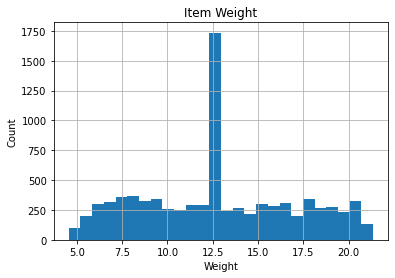

In [14]:
# Histogram for item weight column
df['Item_Weight'].hist(bins='auto')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Item Weight')

Text(0.5, 1.0, 'Outlet Sales')

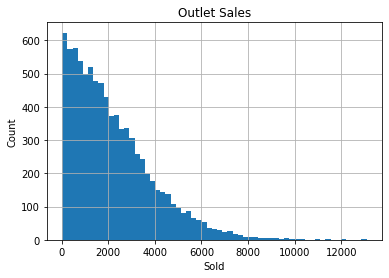

In [15]:
# Histogram for the item outlet sales
df['Item_Outlet_Sales'].hist(bins='auto')
plt.xlabel('Sold')
plt.ylabel('Count')
plt.title('Outlet Sales')

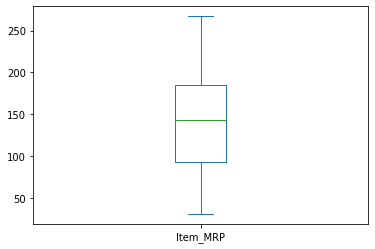

In [16]:
# Boxplot for the Item MRP
df['Item_MRP'].plot(kind='box')
plt.xlabel = 'MRP'
plt.ylabel = 'Number of Items Count'
plt.title = 'Item MRP'

In [17]:
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

In [18]:
corr = df.corr()

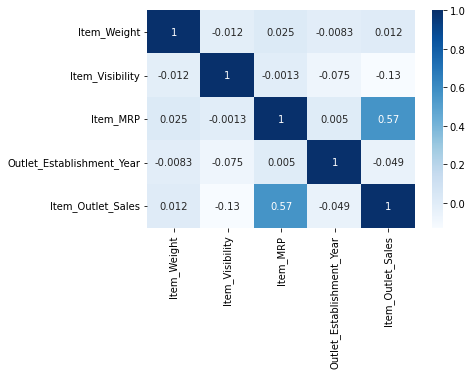

In [19]:
# Heatmap
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues', annot= True)